# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
sns.set(style='whitegrid')

**Loading the Dataset**

In [3]:
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)


In [4]:
df_wine['class'] = wine.target

In [5]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
df_wine['class'].unique()

array([0, 1, 2])

**plot the PCA results**

In [7]:
# Function to plot the PCA results
def plot_pca(X_pca, y):
    """Plot the 2-dimensional data after dimensionality reduction using PCA.

    Parameters
    ----------
    X_pca : array-like, shape (n_samples, 2)
        The 2-dimensional data after PCA.
    y : array-like, shape (n_samples,)
        The target variable.
    """
    colors = ['#de3838', '#007bc3', '#ffd12a']  # Crimson, CornflowerBlue, Gold
    markers = ['o', 'x', ',']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(X_pca[y==l, 0], X_pca[y==l, 1],
                    c=c, marker=m, label=l)

    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    plt.show()

**Extracting the features and target variable **

In [8]:
X = df_wine.iloc[:, :-1].values  # Get features excluding the 'class' column
y = df_wine.iloc[:, -1].values  # Get the 'class' column

**Standardizing The Input Features**

In [9]:
# Standardize the features
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [10]:
X_std.shape

(178, 13)

**Implementing PCA from Manually**

In [11]:
# Compute the covariance matrix
cov_mat = np.cov(X_std.T)

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [12]:
# Create eigenvalue-eigenvector pairs
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the eigenvalue-eigenvector pairs based on the eigenvalues in descending order
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [13]:
# Get the eigenvectors corresponding to the top two eigenvalues
w1 = eigen_pairs[0][1]  # Eigenvector for the 1st principal component
w2 = eigen_pairs[1][1]  # Eigenvector for the 2nd principal component

# Create the projection matrix
W = np.stack([w1, w2], axis=1)

# Perform dimensionality reduction (13-dimensional -> 2-dimensional)
X_pca = X_std @ W

In [14]:
X_pca.shape

(178, 2)

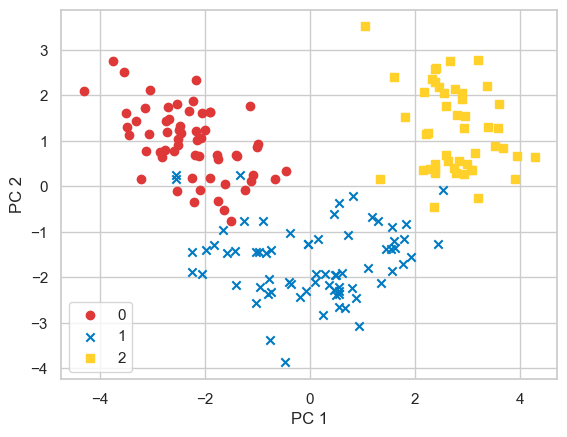

In [15]:
# Plot the 2-dimensional data after dimensionality reduction using PCA
plot_pca(X_pca, y)

**Implementing PCA using scikit-learn**

In [17]:
X_pca = PCA(n_components=2, random_state=42).fit_transform(X_std)

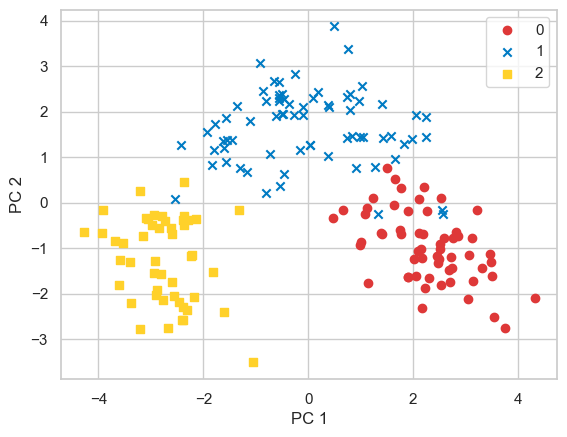

In [18]:
# Plot the 2-dimensional data after dimensionality reduction using PCA
plot_pca(X_pca, y)